# Workflows de Análise de Dados e Geoestatística
---

## Módulo 2 - Análise Exploratória e Visualização de Dados com Python

**Objetivo**

* apresentar conceitos e funções iniciais da análise exploratória de dados (ou **EDA** - *exploratory data analysis*), utilizando a linguagem Python;
* a idéia é apresentar o básico de bibliotecas voltadas a dados e utilizá-las para conhencermos os dados que estamos trabalhando

**Questões**

Algumas questões para exercitar:

* 

### Imports e Setup
---

* importando bibliotecas e configurando nossos plots

In [1]:
# paths
import os

# pandas
import pandas as pd
import numpy as np

# data viz
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# configuring seaborn plots

sns.set_style("ticks", {'axes.grid':False})
sns.set_context("talk")

### Helper Functions
---

* criando funções auxiliares para acessar diretórios e sumarizar um dataframe 

In [37]:
# directories: getting working paths

def get_directories():
    
    CURRENT_DIR = os.path.dirname(os.path.realpath('__file__'))
    PARENT_DIR = os.path.dirname(CURRENT_DIR)
    DATA_DIR = os.path.join(PARENT_DIR, 'data')
    
    dirs = {
        "CURRENT_DIR" : CURRENT_DIR,
        "PARENT_DIR" : PARENT_DIR,
        "DATA_DIR" : DATA_DIR
    }

    return (dirs)


# dataframe metadata
def meta_df(df):
    return pd.DataFrame({'dtypes': df.dtypes,
                         'nmissing': df.isna().sum(),
                         'missing%': round(df.isna().sum()/df.shape[0]*100, 2),
                         'nunique': df.nunique(),
                         'nunique%': round(df.nunique()/df.shape[0]*100, 2),
                         'size': df.shape[0]}, index = df.columns)


# dataframe metadata - new
def new_meta_df(df):
    return pd.DataFrame({'dtypes': df.dtypes,
                         
                         'min': round(df.min(numeric_only=True),2),
                         'q1 - 1.5 * iqr':  round(df.quantile(.25),2) - (1.5*(round(df.quantile(.75),2) - round(df.quantile(.25),2))),
                         'p05': round(df.quantile(.05),2),
                         'p25': round(df.quantile(.25),2),
                         'p50': round(df.quantile(.50),2),
                         'p75': round(df.quantile(.75),2),
                         'p95': round(df.quantile(.95),2),
                         'q3 + 1.5 * iqr':  round(df.quantile(.75),2) + (1.5*(round(df.quantile(.75),2) - round(df.quantile(.25),2))),
                         'max': round(df.max(numeric_only=True),2),
                         
                         'avg': round(df.mean(numeric_only=True),2),
                         'sd': round(df.std(numeric_only=True),2),
                         
                         'nmissing': df.isna().sum(),
                         'missing%': round(df.isna().sum()/df.shape[0]*100,2),
                         'nunique': df.nunique(),
                         'nunique%': round(df.nunique()/df.shape[0]*100,2),
                         'size': df.shape[0]}, index = df.columns)


In [4]:
get_directories()

{'CURRENT_DIR': 'C:\\Users\\lucas\\Desktop\\code\\workflows-geoestatistica-data\\modulo_2',
 'PARENT_DIR': 'C:\\Users\\lucas\\Desktop\\code\\workflows-geoestatistica-data',
 'DATA_DIR': 'C:\\Users\\lucas\\Desktop\\code\\workflows-geoestatistica-data\\data'}

In [5]:
# importing data

dirs = get_directories()
df_jura = pd.read_csv(os.path.join(dirs["DATA_DIR"],"silver_jura.csv"))

df_jura.head(10)

,vlLocX,vlLocY,descLanduse,descUnit,vlCadmium,vlCobalt,vlChromium,vlNickel,vlLead,vlZinc,status,rankCadmium,rankCobalt,rankChromium,rankNickel,rankPb,rankZn,descAnomalyZn
0,1.932,1.004,campo,argoviano,0.135,4.520,15.08,5.24,37.00,32.56,NaN,0.00,0.14,0.02,0.03,0.28,0.04,normal
1,1.824,0.999,campo,argoviano,0.165,3.752,18.60,7.08,56.40,44.00,NaN,0.00,0.07,0.06,0.07,0.68,0.12,normal
2,1.883,1.176,campo,argoviano,0.195,3.920,21.80,7.52,49.60,43.20,NaN,0.01,0.10,0.12,0.10,0.56,0.10,normal
3,1.837,1.037,campo,argoviano,0.215,3.880,23.00,8.16,46.80,44.00,NaN,0.01,0.09,0.14,0.11,0.51,0.12,normal
4,3.768,2.775,floresta,kimmeridgiano,0.220,10.800,26.32,17.52,31.88,45.20,NaN,0.02,0.60,0.20,0.37,0.11,0.14,normal
5,1.839,0.995,campo,argoviano,0.225,4.240,24.88,10.12,55.60,56.00,NaN,0.02,0.12,0.17,0.16,0.68,0.26,normal
6,2.537,3.768,campo,argoviano,0.230,3.792,18.20,5.68,26.84,32.08,NaN,0.02,0.08,0.04,0.05,0.04,0.03,normal
7,2.502,3.988,campo,argoviano,0.240,3.760,18.92,5.20,22.36,32.24,NaN,0.03,0.08,0.06,0.03,0.02,0.04,normal
8,1.842,0.989,campo,argoviano,0.240,4.520,27.96,11.32,52.40,56.40,NaN,0.03,0.14,0.26,0.20,0.62,0.26,normal
9,1.897,1.220,campo,argoviano,0.260,3.480,16.24,4.76,27.00,27.20,NaN,0.04,0.04,0.03,0.01,0.05,0.01,normal


### Conhecendo nosso dataset
---

* ``describe`` traz a contagem, média, desvio padrão, min, P25, P50, P75 e max do dataframe
* ``info`` traz a contagem de valores não-nulos e to tipo de dado de cada coluna 

In [6]:
df_jura.describe()

,vlLocX,vlLocY,vlCadmium,vlCobalt,vlChromium,vlNickel,vlLead,vlZinc,rankCadmium,rankCobalt,rankChromium,rankNickel,rankPb,rankZn
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,2.967187,2.667466,1.311578,9.372781,35.122072,19.817211,53.690996,74.894183,0.499084,0.498645,0.498964,0.499323,0.498566,0.498406
std,0.968665,1.291176,0.917809,3.587008,10.867720,8.280822,29.706448,28.966661,0.290769,0.290201,0.290452,0.290343,0.290220,0.290755
min,0.626000,0.580000,0.135000,1.552000,8.720000,4.200000,18.960000,25.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.282000,1.510500,0.637500,6.580000,27.540000,13.800000,36.480000,54.600000,0.245000,0.245000,0.245000,0.250000,0.250000,0.250000
50%,3.040000,2.581000,1.070000,9.840000,35.000000,20.640000,46.000000,73.560000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,3.658500,3.752000,1.730000,12.040000,42.460000,25.700000,60.400000,90.000000,0.750000,0.745000,0.750000,0.750000,0.750000,0.750000
max,4.840000,5.690000,5.129000,17.720000,67.600000,53.200000,229.560000,219.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df_jura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vlLocX         251 non-null    float64
 1   vlLocY         251 non-null    float64
 2   descLanduse    251 non-null    object 
 3   descUnit       251 non-null    object 
 4   vlCadmium      251 non-null    float64
 5   vlCobalt       251 non-null    float64
 6   vlChromium     251 non-null    float64
 7   vlNickel       251 non-null    float64
 8   vlLead         251 non-null    float64
 9   vlZinc         251 non-null    float64
 10  status         4 non-null      object 
 11  rankCadmium    251 non-null    float64
 12  rankCobalt     251 non-null    float64
 13  rankChromium   251 non-null    float64
 14  rankNickel     251 non-null    float64
 15  rankPb         251 non-null    float64
 16  rankZn         251 non-null    float64
 17  descAnomalyZn  251 non-null    object 
dtypes: float64

* usando nossas funções ``meta_df`` e ``meta_df_new``

In [8]:
meta_df(df_jura)

,dtypes,nmissing,missing%,nunique,nunique%,size
vlLocX,float64,0,0.00,238,94.82,251
vlLocY,float64,0,0.00,241,96.02,251
descLanduse,object,0,0.00,4,1.59,251
descUnit,object,0,0.00,5,1.99,251
vlCadmium,float64,0,0.00,209,83.27,251
vlCobalt,float64,0,0.00,172,68.53,251
vlChromium,float64,0,0.00,198,78.88,251
vlNickel,float64,0,0.00,213,84.86,251
vlLead,float64,0,0.00,192,76.49,251
vlZinc,float64,0,0.00,183,72.91,251


In [38]:
new_meta_df(df_jura)

,dtypes,min,q1 - 1.5 * iqr,p05,p25,p50,p75,p95,q3 + 1.5 * iqr,max,avg,sd,nmissing,missing%,nunique,nunique%,size
vlLocX,float64,0.63,0.210,1.33,2.28,3.04,3.66,4.49,5.730,4.84,2.97,0.97,0,0.00,238,94.82,251
vlLocY,float64,0.58,-1.850,0.99,1.51,2.58,3.75,4.92,7.110,5.69,2.67,1.29,0,0.00,241,96.02,251
descLanduse,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,4,1.59,251
descUnit,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.00,5,1.99,251
vlCadmium,float64,0.14,-0.995,0.28,0.64,1.07,1.73,3.48,3.365,5.13,1.31,0.92,0,0.00,209,83.27,251
vlCobalt,float64,1.55,-1.610,3.54,6.58,9.84,12.04,14.42,20.230,17.72,9.37,3.59,0,0.00,172,68.53,251
vlChromium,float64,8.72,5.160,18.36,27.54,35.00,42.46,52.80,64.840,67.60,35.12,10.87,0,0.00,198,78.88,251
vlNickel,float64,4.20,-4.050,5.88,13.80,20.64,25.70,32.50,43.550,53.20,19.82,8.28,0,0.00,213,84.86,251
vlLead,float64,18.96,0.600,26.98,36.48,46.00,60.40,103.30,96.280,229.56,53.69,29.71,0,0.00,192,76.49,251
vlZinc,float64,25.20,1.500,33.18,54.60,73.56,90.00,133.34,143.100,219.32,74.89,28.97,0,0.00,183,72.91,251


In [9]:
unities = df_jura["descUnit"]
unities[10]

'quaternario'

In [10]:
unities.nunique()

5

In [11]:
unities.value_counts(normalize=True)

kimmeridgiano    0.330677
sequaniano       0.250996
quaternario      0.207171
argoviano        0.199203
portlandiano     0.011952
Name: descUnit, dtype: float64

In [49]:
df_jura[["descLanduse", "descUnit"]].value_counts(normalize=True)

descLanduse  descUnit     
campo        quaternario      0.183267
             kimmeridgiano    0.171315
             argoviano        0.147410
             sequaniano       0.131474
pastagem     sequaniano       0.099602
floresta     kimmeridgiano    0.083665
pastagem     kimmeridgiano    0.071713
floresta     argoviano        0.023904
pastagem     argoviano        0.023904
             quaternario      0.019920
floresta     sequaniano       0.011952
lavoura      sequaniano       0.007968
floresta     portlandiano     0.003984
campo        portlandiano     0.003984
lavoura      kimmeridgiano    0.003984
             quaternario      0.003984
pastagem     portlandiano     0.003984
lavoura      argoviano        0.003984
dtype: float64

In [12]:
status = df_jura["status"]
list(status.unique())

[nan, 'bad']

In [44]:
status.value_counts()

good    247
bad       4
Name: status, dtype: int64

In [ ]:
# preenchimento de dados faltantes
df_jura['status'].fillna(value='good', inplace=True)

In [45]:
status.value_counts()

good    247
bad       4
Name: status, dtype: int64

**Alguns pontos sobre nosso dataset**

* 251 registros
* 4 amostras ruins (fake)
* 1/3 dos registros do 'kimmeridgiano'
* ~2/3 das amostras coletadas em 'campo'
  * 18% amostras coletadas em 'campo', do 'quaternario'

### Estatística Descritiva
---

  * n de elementos (dados não nulos)
  * quantidade de elementos distintos
  * média
  * mediana
  * moda
  * quantils - Q1 e Q3
  * IQR
    * existem outliers?

In [14]:
# média e mediana

vl_cadmium = df_jura["vlCadmium"]

media_cadmium = vl_cadmium.mean()
mediana_cadmium = vl_cadmium.median()

print('média de cadmium =', media_cadmium)
print('mediana de cadmium =', mediana_cadmium)

média de cadmium = 1.3115776892430278
mediana de cadmium = 1.07


In [16]:
for q in [.25, .5, .75]:
  print('quantile', q, '-', vl_cadmium.quantile(q))

quantile 0.25 - 0.6375
quantile 0.5 - 1.07
quantile 0.75 - 1.73


### Visualização de Dados
---

#### Histograma

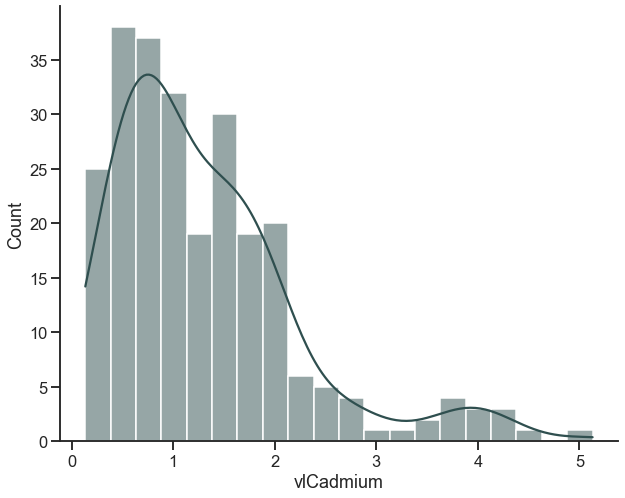

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(vl_cadmium, bins=20, color="darkslategray", kde=True)

sns.despine()
plt.show()

#### Boxplot

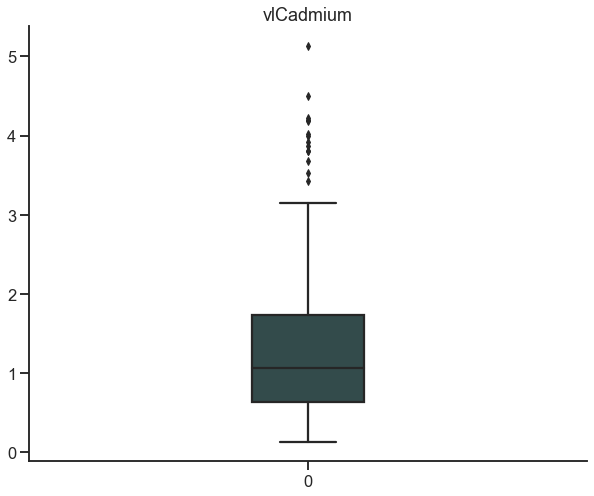

In [18]:
plt.figure(figsize=(10,8))

b = sns.boxplot(vl_cadmium, width=.2, color="darkslategray")
b.set_title('vlCadmium')

sns.despine()
plt.show()

#### Boxplot por Categoria

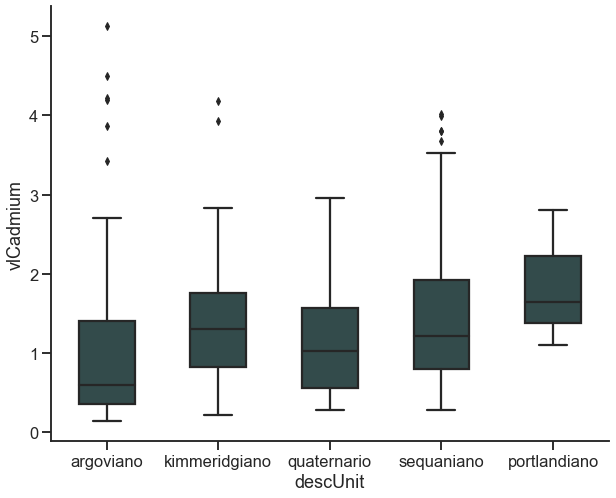

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_jura, x="descUnit", y="vlCadmium", width=.5, color="darkslategray")
sns.despine()

#### **Análise bivariada**

#### Scatter Plot

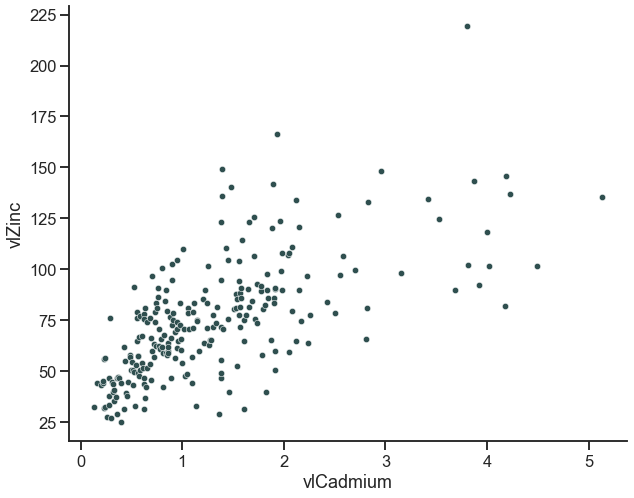

In [20]:
# scatter plot
plt.figure(figsize=(10,8))
x=df_jura["vlCadmium"]
y=df_jura["vlZinc"]
sp = sns.scatterplot(x=df_jura["vlCadmium"], y=df_jura["vlZinc"], s=40, color="darkslategrey")
sns.despine()

#### Multiplot

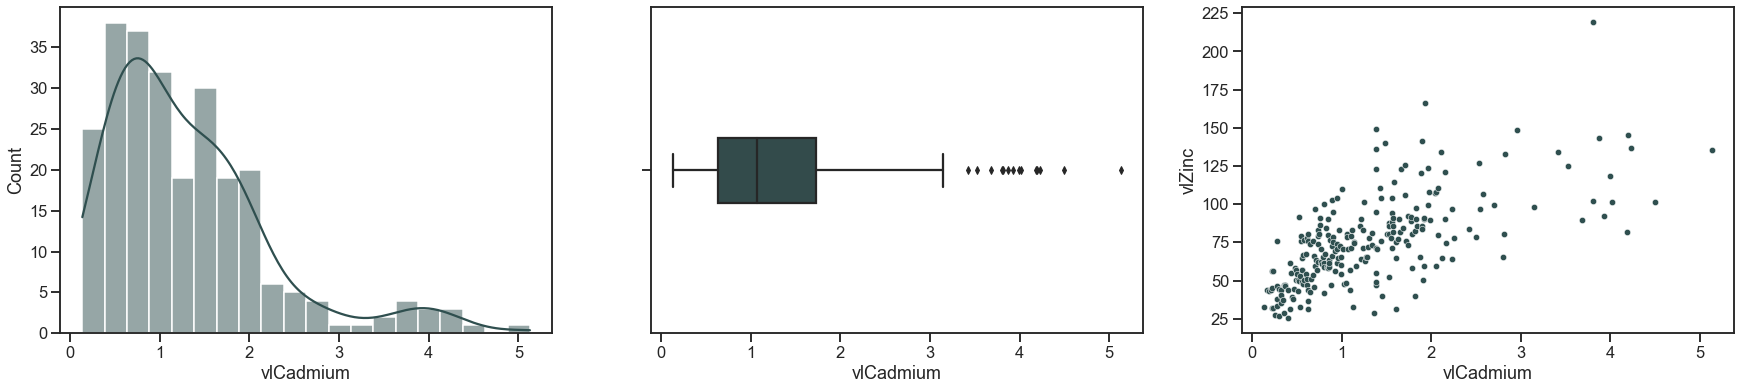

In [21]:
fig, axs = plt.subplots(1, 3, figsize = (30,6))

sns.histplot(vl_cadmium, bins=20, color="darkslategray", kde=True, ax=axs[0])
sns.boxplot(x=df_jura["vlCadmium"], width=.2, color="darkslategray", orient='y', ax=axs[1])
sns.scatterplot(x=df_jura["vlCadmium"], y=df_jura["vlZinc"], s=40, color="darkslategrey", ax=axs[2])

plt.show()

###

#### Ternary Plot com `pyroplot`

In [22]:
from pyrolite.plot import pyroplot

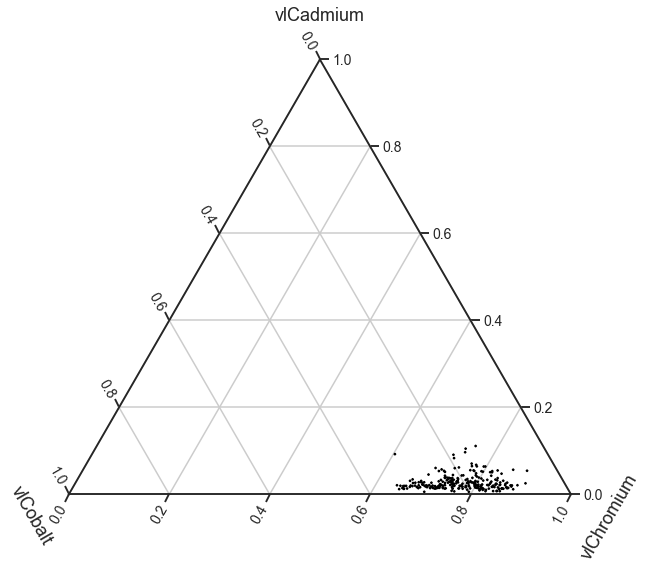

In [23]:
elements_ternary = ["vlCadmium", "vlCobalt", "vlChromium"]

df_ternary = df_jura.loc[:, elements_ternary].copy()

ax = df_ternary.pyroplot.scatter(c="k",figsize=(25,8), s=1)

ax.taxis.set_label_text(fontdict={'size':18}, label="vlCadmium")
ax.laxis.set_label_text(fontdict={'size':18}, label="vlCobalt")
ax.raxis.set_label_text(fontdict={'size':18}, label="vlChromium")

for axs in [ax.taxis, ax.laxis, ax.raxis]:
  axs.set_tick_params(labelsize=14)

ax.grid()
plt.show()